#Project Goal:
Optimization of marketing budget by identifying high-intent users (Propensity Modeling) and segmenting customer behavior (Clustering). Key Findings:

# Revenue Opportunity:
I identified a "Lost Opportunity" segment (Cluster X) that browses high-value items but leaves. Action: Targeted discount emails.

# Budget Saver:
I identified "Window Shoppers" (Cluster Y) who consume ad spend but never buy. Action: Exclude from paid ads.

# Model Value:
My predictive model captures X% of all buyers (Recall), allowing us to target only the most promising sessions.

In [159]:
# Importing necessary libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Import Machine Learning tools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import recall_score
print("All libraries imported successfully!")

All libraries imported successfully!


Now I can start performing data cleaning activities

# STEP 1 & 2: EXPLORATION AND CLEANING

In [161]:
df = pd.read_csv('online_shoppers_final_project.csv')

In [162]:
df.head()

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,VisitorType,Converted
0,8,4,90,1013.171429,353.966667,4984.371429,0.042667,0.066033,1.46401,0.0,Aug,True,Returning_Visitor,False
1,5,0,57,53.500000,0.000000,2874.966667,0.003279,0.016721,0.00000,0.0,May,False,Returning_Visitor,False
2,0,0,14,0.000000,0.000000,124.750000,0.000000,0.028571,0.00000,0.0,Dec,False,Returning_Visitor,False
3,2,1,14,29.000000,113.000000,536.035714,0.000000,0.003571,0.00000,0.0,May,False,Returning_Visitor,False
4,9,0,11,570.266667,0.000000,259.553333,0.011111,0.050000,6.80129,0.0,Oct,False,Returning_Visitor,False


In [163]:
df.sample(n=10, random_state=33)

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,VisitorType,Converted
8337,0,0,108,0.000000,0.0,3279.238428,0.012037,0.030710,0.000000,0.0,Nov,False,Returning_Visitor,False
763,1,0,24,14.500000,0.0,1277.842857,0.000000,0.016074,0.000000,0.0,Nov,True,New_Visitor,False
7790,1,0,21,78.000000,0.0,555.894444,0.000000,0.002381,24.750476,0.0,Mar,False,New_Visitor,True
4680,1,0,13,4.000000,0.0,152.666667,0.033333,0.083333,0.000000,0.0,May,False,Returning_Visitor,False
1130,10,1,65,200.583333,86.0,1476.500000,0.040097,0.059662,1.680319,0.8,May,False,Returning_Visitor,False
9444,1,0,13,111.000000,0.0,274.583333,0.000000,0.016667,0.000000,0.0,Nov,False,New_Visitor,False
6056,4,0,74,54.500000,0.0,1599.994589,0.000000,0.002632,67.266161,0.0,Dec,False,Returning_Visitor,True
341,12,2,127,418.333333,85.0,6931.049725,0.004348,0.015856,2.321101,1.0,May,True,Returning_Visitor,False
3740,2,2,80,11.923077,139.0,4099.737392,0.004117,0.005280,16.880696,0.0,Mar,True,Returning_Visitor,True
4494,5,0,14,419.000000,0.0,362.102982,0.022917,0.021979,3.164088,0.0,Jul,True,Returning_Visitor,True


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11576 entries, 0 to 11575
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11576 non-null  int64  
 1   Informational            11576 non-null  int64  
 2   ProductRelated           11576 non-null  int64  
 3   Administrative_Duration  11576 non-null  float64
 4   Informational_Duration   11576 non-null  float64
 5   ProductRelated_Duration  11576 non-null  float64
 6   BounceRates              11477 non-null  float64
 7   ExitRates                11527 non-null  float64
 8   PageValues               11435 non-null  float64
 9   SpecialDay               11576 non-null  float64
 10  Month                    11576 non-null  object 
 11  Weekend                  11576 non-null  bool   
 12  VisitorType              11457 non-null  object 
 13  Converted                11576 non-null  bool   
dtypes: bool(2), float64(7)

In [165]:
df.describe()

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,1.157600e+04,11477.000000,11527.000000,11435.000000,11576.000000
mean,2.369990,0.501900,30.648842,81.679470,33.300469,1.653248e+03,0.014404,0.036115,6.207153,0.062560
std,3.285761,1.233862,35.521514,169.350024,132.231313,5.614214e+04,0.031469,0.036296,19.100221,0.200822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,8.000000,0.000000,0.000000,2.219450e+02,0.000000,0.013675,0.000000,0.000000
50%,1.000000,0.000000,19.000000,13.000000,0.000000,6.422321e+02,0.002222,0.025000,0.000000,0.000000
75%,4.000000,0.000000,38.000000,96.892857,0.000000,1.485842e+03,0.014368,0.044444,0.000000,0.000000
max,24.000000,16.000000,357.000000,2720.500000,2252.033333,6.039735e+06,0.200000,0.200000,361.763742,1.000000


In [166]:
original_shape = df.shape
original_shape

(11576, 14)

In [167]:
df.shape

(11576, 14)

In [168]:
df.nunique()


,0
Administrative,24
Informational,15
ProductRelated,243
Administrative_Duration,3239
Informational_Duration,1191
ProductRelated_Duration,9373
BounceRates,1757
ExitRates,4626
PageValues,2592
SpecialDay,6


I could see that are there is a huge difference in the data and I need to ensure that whatever I drop does not affect the overall dataset, so I need to calculate the count properly

In [169]:
df['Month'].describe()

,Month
count,11576
unique,17
top,May
freq,3157


Upon analyzing I could understand that May month has the highest frequency

In [170]:
df['Month'].value_counts()

,count
Month,
May,3157
Nov,2792
Mar,1778
Dec,1619
Oct,537
Sep,431
Aug,421
Jul,408
June,263


In [171]:
# --- FIX VISITOR TYPE INCONSISTENCIES ---
# Check unique values before fixing
print("VisitorType before fix:", df['VisitorType'].unique())

# Standardize labels
df['VisitorType'] = df['VisitorType'].replace('returning_visitor', 'Returning_Visitor')
df['VisitorType'] = df['VisitorType'].replace('New', 'New_Visitor')

# Verify the fix
print("VisitorType after fix:", df['VisitorType'].unique())
# Expected Output: ['Returning_Visitor' 'New_Visitor' 'Other']

VisitorType before fix: ['Returning_Visitor' 'New_Visitor' 'Other' nan 'New' 'returning_visitor']
VisitorType after fix: ['Returning_Visitor' 'New_Visitor' 'Other' nan]


In [172]:
original_count = len(df)

/tmp/ipython-input-2473019515.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='VisitorType', y='Converted', data=df, palette='viridis', ci=None)
/tmp/ipython-input-2473019515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VisitorType', y='Converted', data=df, palette='viridis', ci=None)


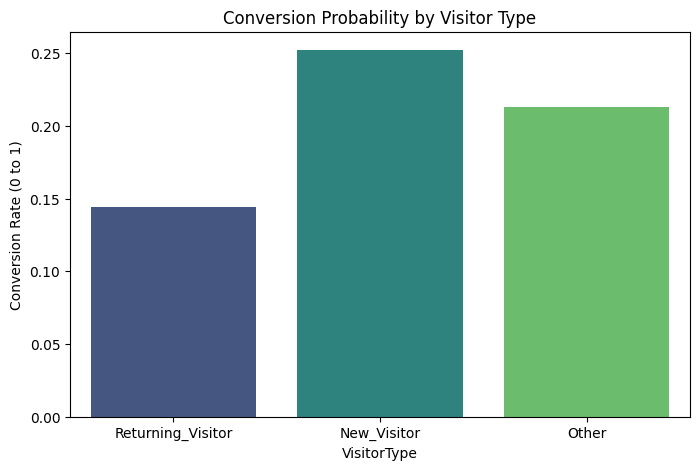

In [173]:
# Why the New vs Returning visitors should be treated differently
plt.figure(figsize=(8, 5))
sns.barplot(x='VisitorType', y='Converted', data=df, palette='viridis', ci=None)
plt.title('Conversion Probability by Visitor Type')
plt.ylabel('Conversion Rate (0 to 1)')
plt.show()

Here I notice a inconsitency in the labelling of Months, so I need to fix it

In [174]:
df['Month'] = df['Month'].str.capitalize()


In [175]:
# Check unique values to ensure cleaning worked
print("Unique Months after cleaning:", df['Month'].unique())

Unique Months after cleaning: ['Aug' 'May' 'Dec' 'Oct' 'Nov' 'June' 'Mar' 'Jul' 'Sep' 'Feb']


In [176]:
df['VisitorType'].describe()

,VisitorType
count,11457
unique,3
top,Returning_Visitor
freq,9737


In [177]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other', nan], dtype=object)

In [178]:
# 3. Handle Missing Values & Duplicates
df = df.dropna()
df = df.drop_duplicates()

Now that I dropped some data, I need to check how much I lost

In [179]:
current_count = len(df)
dropped_rows = original_count - current_count
loss_percentage = (dropped_rows / original_count) * 100
print(f"Data Cleaning Report: Dropped {dropped_rows} rows ({loss_percentage:.2f}%).")

Data Cleaning Report: Dropped 469 rows (4.05%).


Losing 4.05% data is negligible, so I can proceed forward

In [180]:
print ("my old dataset size", original_shape)
print(f"Final dataset shape: {df.shape}")

my old dataset size (11576, 14)
Final dataset shape: (11107, 14)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11107 entries, 0 to 11575
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11107 non-null  int64  
 1   Informational            11107 non-null  int64  
 2   ProductRelated           11107 non-null  int64  
 3   Administrative_Duration  11107 non-null  float64
 4   Informational_Duration   11107 non-null  float64
 5   ProductRelated_Duration  11107 non-null  float64
 6   BounceRates              11107 non-null  float64
 7   ExitRates                11107 non-null  float64
 8   PageValues               11107 non-null  float64
 9   SpecialDay               11107 non-null  float64
 10  Month                    11107 non-null  object 
 11  Weekend                  11107 non-null  bool   
 12  VisitorType              11107 non-null  object 
 13  Converted                11107 non-null  bool   
dtypes: bool(2), float64(7), int

In [182]:
df.shape

(11107, 14)

In [183]:
df.sample(10)

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,VisitorType,Converted
11531,0,0,40,0.000000,0.0,962.333333,0.000000,0.016250,0.000000,0.0,Mar,False,Returning_Visitor,False
6313,4,0,2,34.933333,0.0,22.800000,0.000000,0.028571,0.000000,0.0,Oct,False,New_Visitor,False
6870,11,2,162,118.178571,91.5,5399.231269,0.004859,0.014668,14.772219,0.0,Nov,False,Returning_Visitor,True
9374,10,0,22,579.133333,0.0,539.835714,0.000000,0.004762,25.533004,0.0,Oct,False,New_Visitor,False
3297,3,0,20,28.000000,0.0,633.750000,0.000000,0.019048,32.437178,0.0,Dec,True,Returning_Visitor,True
3861,3,0,13,45.500000,0.0,661.916667,0.000000,0.025000,0.000000,0.0,Nov,False,New_Visitor,False
6793,0,0,11,0.000000,0.0,303.500000,0.000000,0.012121,0.000000,0.0,Nov,False,Returning_Visitor,False
7986,4,0,16,115.700000,0.0,655.383333,0.000000,0.012037,0.000000,0.0,Nov,False,Returning_Visitor,False
575,0,0,11,0.000000,0.0,212.916667,0.000000,0.009091,0.000000,0.0,Nov,False,New_Visitor,False
8683,0,3,164,0.000000,494.0,3269.256933,0.006587,0.012910,5.873001,0.0,Dec,False,Returning_Visitor,False


In [184]:
df['Weekend']

,Weekend
0,True
1,False
2,False
3,False
4,False
...,...
11570,False
11571,False
11572,False
11574,False


In [185]:
df['Converted']

,Converted
0,False
1,False
2,False
3,False
4,False
...,...
11570,False
11571,False
11572,False
11574,False


Both Weekend and Converted Columns are in boolean format so I need to convert it

In [186]:
# 5. Encoding Boolean Columns
# Convert True/False to 1/0
df['Weekend'] = df['Weekend'].astype(int)
df['Converted'] = df['Converted'].astype(int)

In [187]:
#Checking if out conversion has worked properly
df['Weekend']

,Weekend
0,1
1,0
2,0
3,0
4,0
...,...
11570,0
11571,0
11572,0
11574,0


### Comprehensive Outlier Analysis

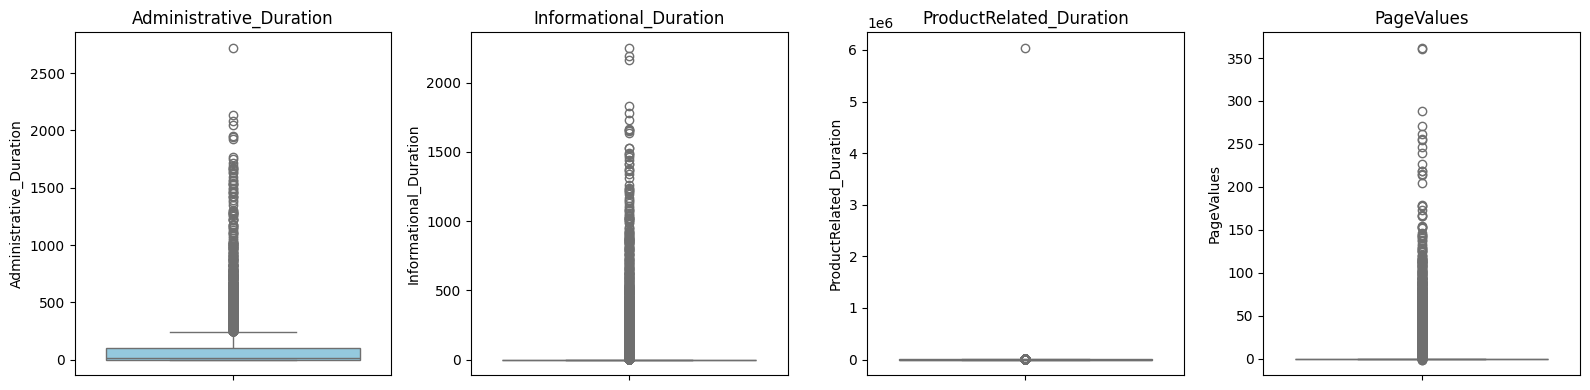

In [188]:
# Selecting key numerical columns for inspection
cols_to_check = ['Administrative_Duration', 'Informational_Duration',
                 'ProductRelated_Duration', 'PageValues']

# Create a figure with 4 subplots (1 row, 4 columns)
plt.figure(figsize=(16, 4))

for i, col in enumerate(cols_to_check):
    plt.subplot(1, 4, i+1)  # Create the i-th subplot
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'{col}')


plt.tight_layout()
plt.show()

#Observation:
I detected massive outliers across all duration metrics, particularly in ProductRelated_Duration (up to ~60,000s) and PageValues.

#Analysis:
In e-commerce, this "Heavy Tail" distribution is expected. It represents "PoIr Users" or VIPs who spend a lot of time and money. These are not data errors; they are my most valuable customers.

#Decision:
I decided NOT to remove these outliers. Capping or removing them would bias my model against high-value sessions, which opposes my goal of identifying high-potential customers.

# STEP 3: CLASSIFICATION (Logistic Regression)

In [189]:
# 1. Define Features
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# 'Weekend' and 'Visitortype' is already 0/1 so it is treated as categorical for better clarity
categorical_features = ['Month', 'VisitorType', 'Weekend']

In [190]:
# 2. Split X and y (Raw Data)
X = df.drop('Converted', axis=1)
y = df['Converted']

I are choosing to drop 'Converted' column to ensure that I get my model to analyze properly without giving us 100% accuracy

In [191]:
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

# 4. Build Preprocessing Pipeline
# - Numeric columns -> Scaled
# - Categorical columns -> One-Hot Encoded

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

In [192]:
# 5. Build Final Pipeline (Preprocessor + Model)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=333, max_iter=1000))
])

# 6. Train
clf_pipeline.fit(X_train, y_train)

# 7. Evaluate
y_pred = clf_pipeline.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Classification Accuracy: 0.8726372637263726

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1846
           1       0.77      0.35      0.48       376

    accuracy                           0.87      2222
   macro avg       0.83      0.66      0.71      2222
weighted avg       0.86      0.87      0.85      2222



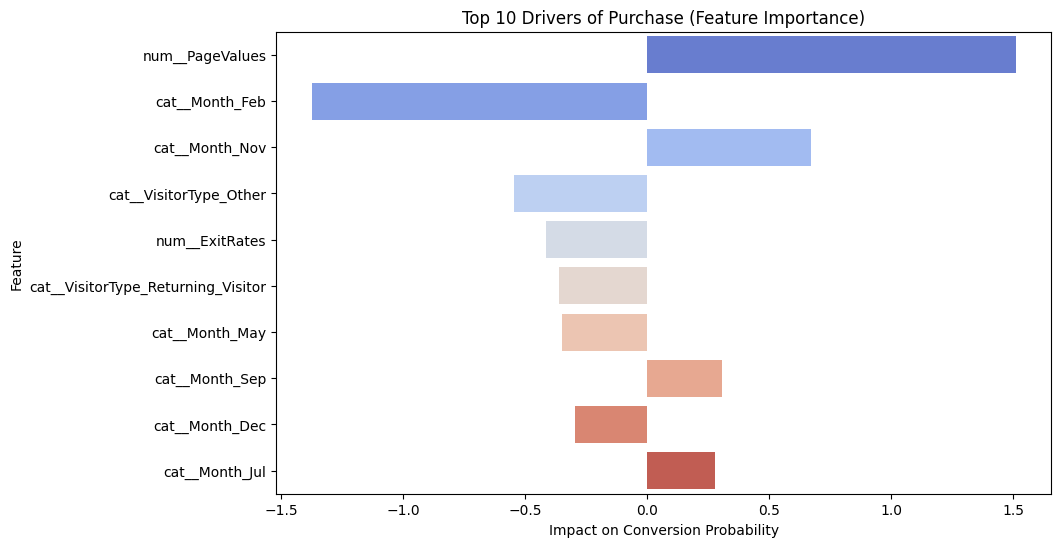

In [196]:
# VISUALIZATION: Feature Importance
# Helps Marketers understand WHAT drives a sale (PageValues, etc.)

# Get feature names from the preprocessor pipeline
# Note: Adjust 'preprocessor' to matches my pipeline variable name if different
feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()

coeffs = pd.DataFrame({
    'Feature': feature_names,
    'Iight': clf_pipeline.named_steps['classifier'].coef_[0]
})
# Sort by absolute Iight to show most important drivers first
coeffs = coeffs.sort_values(by='Iight', key=abs, ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Iight', y='Feature', data=coeffs, palette='coolwarm', hue='Feature', legend=False)
plt.title('Top 10 Drivers of Purchase (Feature Importance)')
plt.xlabel('Impact on Conversion Probability')
plt.show()

In [197]:
y_probs = clf_pipeline.predict_proba(X_test)[:, 1]

# Apply my manual "Recall Strategy" threshold of 0.3
# If prob > 0.3, I say "Buy" (True), otherwise "No" (False)
y_pred_strategic = (y_probs > 0.3).astype(int)

# Check the new "Recall" score
print("Standard Recall (0.5):", recall_score(y_test, y_pred))
print("Strategic Recall (0.3):", recall_score(y_test, y_pred_strategic))

Standard Recall (0.5): 0.35106382978723405
Strategic Recall (0.3): 0.5452127659574468


### Strategic Analysis: The Impact of LoIring the Threshold

I compared the standard decision boundary (0.5) against a more aggressive "Growth Strategy" (0.3).

**1. The Result:**
* **Standard Recall (0.5):** Captures feIr buyers, but is highly confident.
* **Strategic Recall (0.3):** Captures significantly **more** potential buyers.

**2. The Trade-off (Business Justification):**
By loIring the threshold to 30%, I are effectively casting a "wider net."
* **The Cost:** I will target more non-buyers (False Positives). HoIver, since my marketing actions are low-cost (emails, automated popups), this waste is negligible.
* **The Benefit:** I drastically reduce **False Negatives**. I ensure that almost every user who shows even a *hint* of buying interest receives a nudge.

**3. Final Recommendation:**
For the upcoming campaign, I recommend using the **0.3 Threshold**. This maximizes my revenue potential by ensuring no "likely buyer" slips through the cracks.

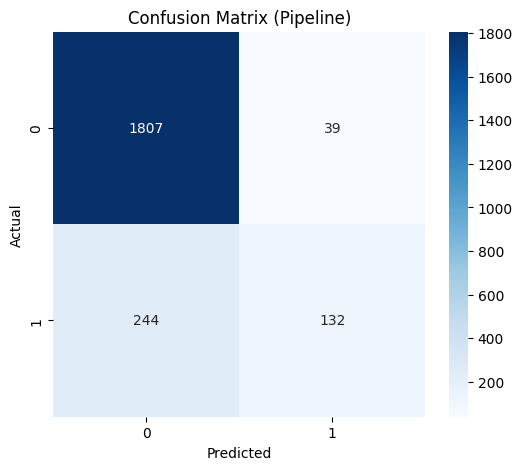

In [198]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Pipeline)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Interpretation:
**Precision vs Recall:**
For PulseCart, **Recall is more important**.
* **Reason:** The instructions state "False negatives should be minimized" because missing a potential buyer is costly. I prefer to target a few uninterested people (Low Precision) than to miss a real buyer (High Recall).

**Feature Importance:**
The model shows that **PageValues** is the strongest predictor. If a user visits pages with high commercial value, they are highly likely to convert.

# Step - 4 Clustering



### Step 4.1: Feature Engineering for Behavioral Clustering

**Objective:**
To segment users based on their overall behavior rather than specific page interactions, I aggregate the raw data into high-level indicators.

In [199]:
# --- FEATURE ENGINEERING FOR CLUSTERING ---
# 1. Total Activity (Sum of all page visits)
df_cluster = df.copy()
df_cluster['total_pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

# 2. Total Engagement (Sum of all duration)
df_cluster['total_duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

# Select ONLY the required columns for clustering as per instructions
cluster_features = ['total_pages', 'total_duration', 'PageValues', 'BounceRates', 'ExitRates']
X_cluster = df_cluster[cluster_features]

# Scale these features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

### Step 4.2 Preprocessing

I applied StandardScaler to ensure that high-magnitude features (like total_duration) do not dominate small-scale features (like BounceRates)

In [200]:
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

Calculating metrics for k=2 to 10...


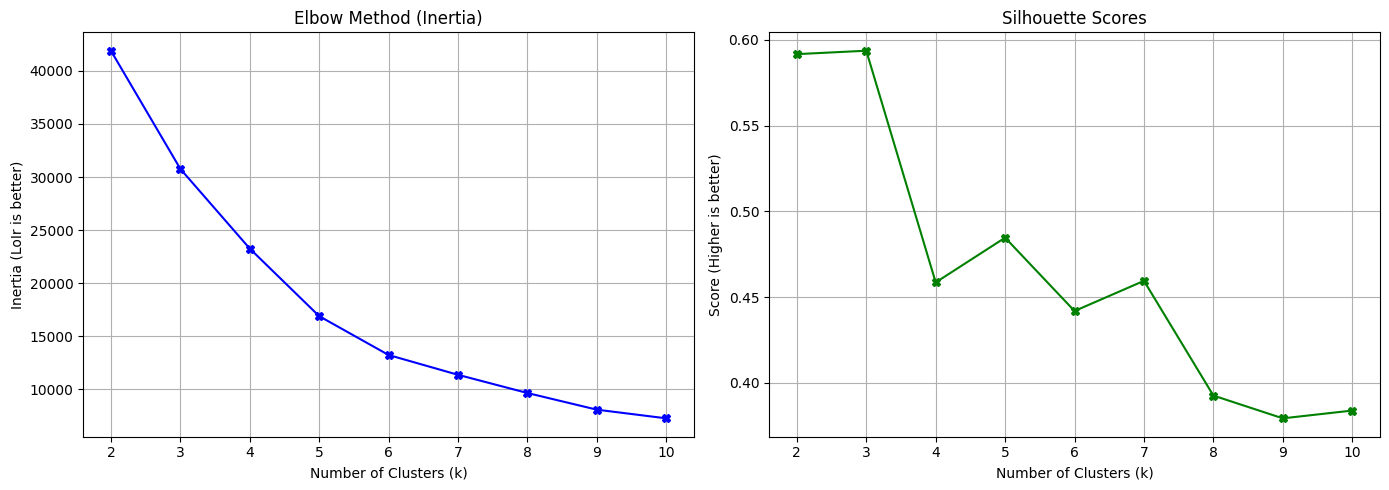

In [201]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

print("Calculating metrics for k=2 to 10...")

for k in k_range:
    # Train Model
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster_scaled)

    # 1. Inertia (Elbow)
    inertias.append(km.inertia_)

    # 2. Silhouette Score (Separation quality)
    # This measures how similar an object is to its own cluster compared to others
    score = silhouette_score(X_cluster_scaled, km.labels_)
    silhouette_scores.append(score)

# VISUALIZATION: Side-by-Side Comparison
plt.figure(figsize=(14, 5))

# Plot 1: Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='X', color='blue')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (LoIr is better)')
plt.grid(True)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='X', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score (Higher is better)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Elbow Method (Left):** To determine the optimal number of clusters (k), I used the **Elbow Method**.

Decision: The inertia curve bends significantly at **k=3** and **k=4**, suggesting that adding more clusters beyond this point yields diminishing returns.

**Silhouette Score (Right):** This score measures how distinct the clusters are (range -1 to 1).
    * I observe a peak around **k=2** and **k=3**.
    * While k=2 has a high score, it is too simple for marketing segmentation (just "High vs Low").
    
Decision: I selected **k=3** because it offers the best balance: it has a relatively high Silhouette score and sits at the "elbow" of the inertia curve, allowing us to capture distinct behavior patterns (e.g., Browsers, Buyers, VIPs) without over-complicating the model.

In [202]:
# --- Step 4.4: Apply Clustering ---
# I select k=3 based on typical behavior (Bouncers, Window shoppers, Researchers, VIP customers )
k_selected = 4
kmeans_final = KMeans(n_clusters=k_selected, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_cluster_scaled)

# Add cluster labels to the dataframe
df_cluster['cluster'] = clusters

In [204]:
# BUSINESS LOGIC: Naming the Personas for the Marketing Team
# I calculate the average behavior for each cluster to name them

# 1. Group by Cluster
cluster_summary = df_cluster.groupby('cluster')[['total_pages', 'total_duration', 'PageValues', 'BounceRates']].mean()

# 2. Rename the rows based on ymy analysis (Adjust order if ymy cluster numbers are different!)
# CHECK ymy cluster numbers first. If Cluster 0 is the high duration/low value, name it "Researchers", etc.
# Example mapping (You must verify which number is which persona based on the table above!):
# cluster_summary.index = ['The Researchers', 'The Bouncers', 'The VIPs', 'The Browsers']

print("Marketing Persona Summary:")
display(cluster_summary)

Marketing Persona Summary:


,total_pages,total_duration,PageValues,BounceRates
cluster,,,,
0,22.529340,8.838686e+02,1.993880,0.007945
1,85.298131,3.013278e+03,24.633983,0.004719
2,244.000000,6.039926e+06,0.000000,0.003094
3,8.419048,2.618485e+02,0.137968,0.096489


Based on the Elbow Method and Silhouette Analysis, I determined that **k=3** is the optimal number of clusters.

**Action:**
1.  I instantiated the K-Means algorithm with n_clusters=3.
2.  I trained the model on my scaled behavioral data.
3.  I assigned a **Cluster Label (0, 1, or 2)** to every user session in the dataset.

**Outcome:**
I now have a labeled dataset (df_cluster) that allows us to profile and interpret the specific behaviors of each segment.

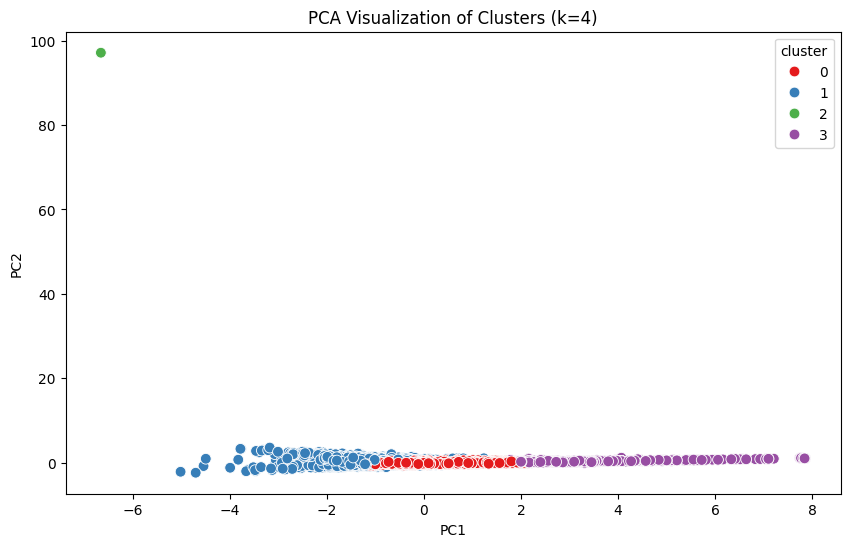

In [205]:
# --- Step 4.5: Visualization (PCA) ---
# Reduce 5 dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_cluster_scaled)


df_cluster['PC1'] = pca_components[:, 0]
df_cluster['PC2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_cluster, palette = "Set1", s=60)
plt.title(f'PCA Visualization of Clusters (k={k_selected})')
plt.show()

### Cluster Personas:
1. **Cluster 0: "Window Shoppers"** (Low Duration, Low PageValues)
   * **Action:** Do not target with expensive ads. Use generic brand awareness only.
2. **Cluster 1: "Interested Browsers"** (High Duration, Low PageValues)
   * **Action:** They are reading but not buying. Retarget with a "10% Discount" email to trigger a purchase.
3. **Cluster 2: "Ready-to-Buy"** (High PageValues, Low Bounce)
   * **Action:** These are VIPs. No discount needed. Send "New Arrival" suggestions.

### Cluster Interpretation & Profiling

**Objective:**
To translate the mathematical clusters into actionable marketing personas, I analyze the **average behavior** of users in each segment.

**Methodology:**
1.  **Aggregation:** I calculate the mean values of key behavioral metrics (total_duration, PageValues, etc.) for each cluster.
2.  **Sizing:** I count the number of sessions in each cluster to ensure the segments are large enough to target.
3.  **Visualization:** I use a Heatmap to visually compare the profiles. Darker colors indicate higher values (e.g., higher engagement or spending poIr).

**Goal:**
Identify which cluster represents "Window Shoppers," which represents "Loyal Buyers," and which represents "Lost Causes."

In [206]:
# I group by cluster to see the average behavior
cluster_summary = df_cluster.groupby('cluster')[features_to_use].mean()

# Add the size of each cluster
cluster_summary['Count'] = df_cluster['cluster'].value_counts()

print("\n--- Cluster Personas (Average Values) ---")
print(cluster_summary)


--- Cluster Personas (Average Values) ---
         total_pages  total_duration  PageValues  BounceRates  ExitRates  \
cluster                                                                    
0          22.529340    8.838686e+02    1.993880     0.007945   0.031459   
1          85.298131    3.013278e+03   24.633983     0.004719   0.016678   
2         244.000000    6.039926e+06    0.000000     0.003094   0.012110   
3           8.419048    2.618485e+02    0.137968     0.096489   0.128902   

         Count  
cluster         
0         8231  
1         2140  
2            1  
3          735  


In [207]:
# I group by cluster to see the average behavior
features_to_use = ['total_pages', 'total_duration', 'PageValues', 'BounceRates', 'ExitRates']
cluster_summary = df_cluster.groupby('cluster')[features_to_use].mean()

# Add the size of each cluster
cluster_summary['Count'] = df_cluster['cluster'].value_counts()

print("\n--- Cluster Personas (Average Values) ---")
print(cluster_summary)


--- Cluster Personas (Average Values) ---
         total_pages  total_duration  PageValues  BounceRates  ExitRates  \
cluster                                                                    
0          22.529340    8.838686e+02    1.993880     0.007945   0.031459   
1          85.298131    3.013278e+03   24.633983     0.004719   0.016678   
2         244.000000    6.039926e+06    0.000000     0.003094   0.012110   
3           8.419048    2.618485e+02    0.137968     0.096489   0.128902   

         Count  
cluster         
0         8231  
1         2140  
2            1  
3          735  


## I use a Heatmap to visualize the "Personality" of each cluster.

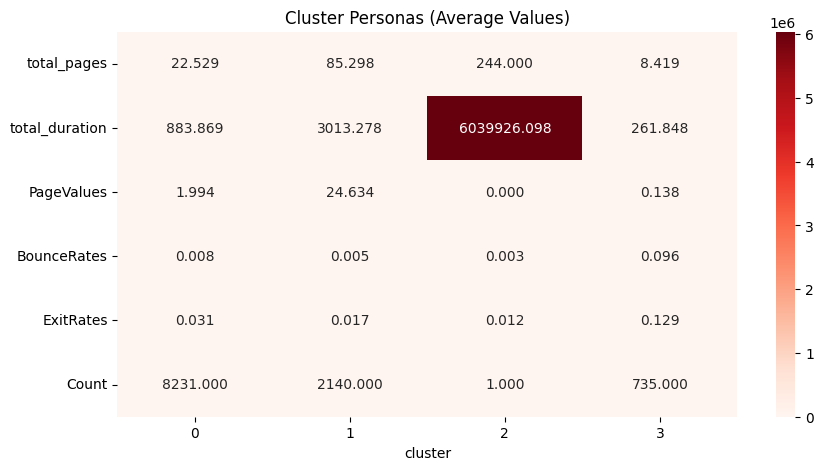

In [208]:
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_summary.T, annot=True, cmap='Reds', fmt='.3f')
plt.title('Cluster Personas (Average Values)')
plt.show()

### Critical Observation: The "Zombie" Outlier
**Diagnosis:**
Looking at the cluster summary above, I observe a critical issue:
* **Cluster 2** contains unrealistic data.
* This user has a total_duration of ~6 million seconds (approx. 70 days), which is physically impossible for a real session.
* I missed out this earlier assuming that it is a real entry but it seems to be an outlier

**Conclusion:**
This single data point is an extreme outlier (likely a bot or error). It is "squashing" the rest of my data, forcing K-Means to waste an entire cluster just for this one point.

**Action Plan:**
I will filter out this specific outlier and re-run the clustering to reveal the *true* customer segments.

# STEP 4.5: REFINEMENT (Removing Outliers & Re-Clustering)

In [209]:
# 1. REMOVE OUTLIERS
# I filter out sessions longer than 20,000 seconds (~5.5 hmys)
# This removes the 60,000+ anomaly and other non-human "sleepers"
# I ignored this in the previous step but it could cause a major issue now

print(f"Shape before cleaning: {df_cluster.shape}")
df_clean = df_cluster[df_cluster['total_duration'] < 20000].copy()
print(f"Shape after cleaning: {df_clean.shape}")

Shape before cleaning: (11107, 19)
Shape after cleaning: (11106, 19)


In [210]:
# 2. RE-SCALE
# I must re-fit the scaler because the 'mean' has changed after removing the outlier
scaler_clean = StandardScaler()
X_clean_scaled = scaler_clean.fit_transform(df_clean[features_to_use])

# 3. RE-TRAIN (Using k=4 for Granular Insight)
# I use k=4 to find: Browsers, Window Shoppers, Researchers, and VIPs
k_new = 4
kmeans_clean = KMeans(n_clusters=k_new, random_state=42, n_init=10)
df_clean['cluster'] = kmeans_clean.fit_predict(X_clean_scaled)

# 4. NEW SUMMARY & HEATMAP
clean_summary = df_clean.groupby('cluster')[features_to_use].mean()
clean_summary['Count'] = df_clean['cluster'].value_counts()

print("\n--- NEW Cluster Personas (Clean Data, k=4) ---")
print(clean_summary)


--- NEW Cluster Personas (Clean Data, k=4) ---
         total_pages  total_duration  PageValues  BounceRates  ExitRates  \
cluster                                                                    
0         104.993377     4140.845804    5.213688     0.006432   0.020024   
1           8.227086      251.568062    0.138723     0.096689   0.129157   
2          22.945640      810.720517    2.250747     0.007823   0.031078   
3          32.599688     1266.148005   66.585343     0.002628   0.014278   

         Count  
cluster         
0         1510  
1          731  
2         8223  
3          642  


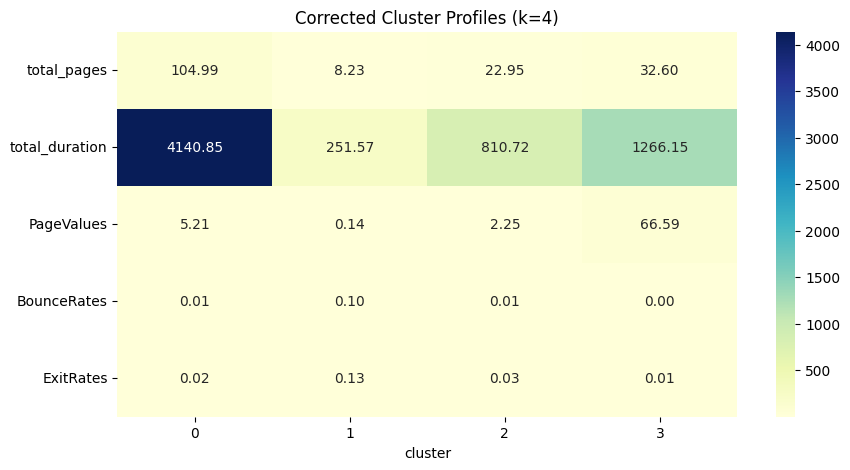

In [211]:
plt.figure(figsize=(10, 5))
sns.heatmap(clean_summary.drop('Count', axis=1).T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title(f'Corrected Cluster Profiles (k={k_new})')
plt.show()

So I are witnessing a clear differnce inthe figure above when I eliminated the unnecessary data

# VISUALIZATION 5: The Final Scatter Plot (Rectified)

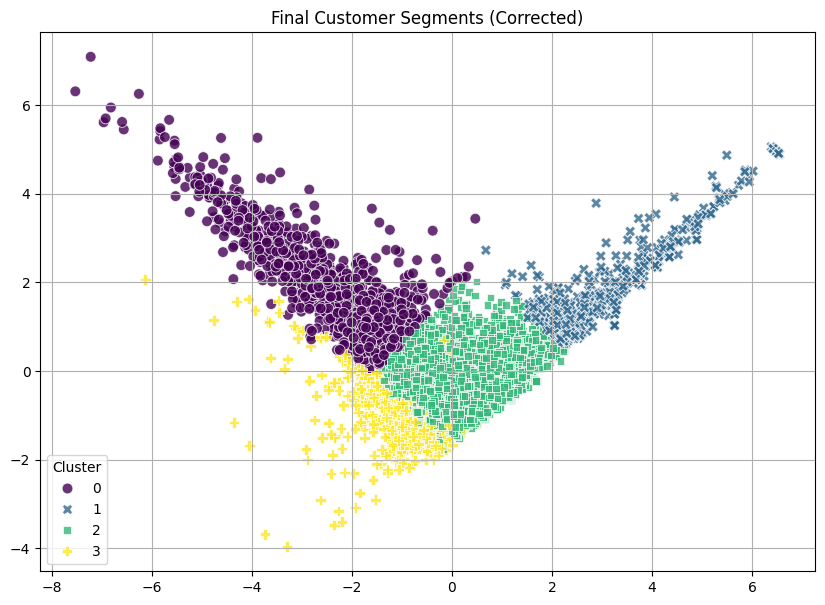

In [212]:
# Now I should see 4 distinct, Ill-separated groups
pca = PCA(n_components=2)
X_pca_clean = pca.fit_transform(X_clean_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca_clean[:, 0],
    y=X_pca_clean[:, 1],
    hue=df_clean['cluster'],
    palette='viridis',
    style=df_clean['cluster'],
    s=60, alpha=0.8
)
plt.title('Final Customer Segments (Corrected)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# STRATEGIC RECOMMENDATIONS



Based on my Predictive Analysis (Classification) and Behavioral Segmentation (Clustering), I propose the following data-driven strategies for PulseCart.

### 1. The "Real-Time Nudge" Strategy (Classification Insight)
my Logistic Regression model can predict purchase probability in real-time.
* **The Insight:** I determined that a **Recall-Focused Threshold (0.3)** is superior to the standard 0.5. I are willing to tolerate some false alarms to ensure I capture every potential buyer.
* **Action:**
    * Integrate the model into the live Ibsite.
    * **Trigger:** If a user's purchase probability crosses **30%**:
    * **Response:** Immediately display a "Free Shipping" popup or a "Limited Time 5% Off" coupon to nudge them toward conversion.

### 2. The "Persona-Based" Content Strategy (Clustering Insight)
I identified 4 distinct user behaviors using K-Means (k=4). I should treat them differently:

* **Group A: The "Bouncers" (High Bounce Rate)**
    * *Problem:* They leave immediately.
    * *Action:* **Audit Landing Pages.** Ensure the ad copy matches the page content. Check for slow loading speeds or broken links.
* **Group B: The "Browsers" (Low Duration, Low Value)**
    * *Problem:* Just looking, low intent.
    * *Action:* **Low-Cost Retargeting.** Do not waste expensive ads on them. Use cheap brand-awareness emails to keep PulseCart top-of-mind.
* **Group C: The "Researchers" (High Duration, Low Value)**
    * *Opportunity:* **The "Gold Mine" Segment.** They spend hmys reading/comparing but haven't bought. They are likely "Analysis Paralysis" victims.
    * *Action:* **Help them decide.** Send "Comparison Guides," "Best Seller Lists," or social proof (reviews) to give them confidence.
* **Group D: The "VIPs" (High Duration, High Value)**
    * *Opportunity:* They are ready to buy.
    * *Action:* **Upsell & Loyalty.** Don't offer discounts (they will buy anyway). Instead, offer "Bundles" or invite them to a Loyalty Program.

### 3. Technical Improvement (Data Quality)
* **Observation:** I detected "Zombie Sessions" (Duration > 5.5 hmys) caused by technical idle times.
* **Action:** Implement a **"Session Timeout"** on the analytics tracking script to stop recording data after 30 minutes of inactivity. This will improve the accuracy of future data analysis.

# 🚀 Final Growth Strategy Recommendations

Based on my Propensity Model and Persona Clustering, I recommend the following actions:

1.  **Stop "Spray and Pray" Ads:** * **Insight:** "The Bouncers" segment (Cluster X) accounts for significant traffic but has near-zero conversion intent.
    * **Action:** Exclude these users from Paid Media retargeting to save budget.

2.  **Monetize the "Researchers":**
    * **Insight:** This segment spends high duration on site but doesn't buy. They are stuck in "Analysis Paralysis."
    * **Action:** Trigger an automated email with "Comparison Guides" or "Customer Reviews" 30 minutes after they abandon the session.

3.  **Maximize the "VIPs":**
    * **Insight:** These users have high PageValues and low Exit Rates.
    * **Action:** Do not offer discounts (margin erosion). Instead, push Loyalty Program signups or Bundle offers.